<a href="https://colab.research.google.com/github/sunjana2199/ML-Climate-Final-Project-Template/blob/main/src/Twitter/Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Dependencies

In [112]:
import pandas as pd
import numpy as np
import string
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [114]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
import warnings
warnings.filterwarnings("ignore")

# Text Peprocessing

##Stop Words

In [117]:
import string
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

#add punctuation char's to stopwords list
stop_words += list(string.punctuation) # <-- contains !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

#add integers
stop_words += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

stop_words += ['new' , 'york', 'near', 'nyc', 'city' , 'newyork', 'ny', 'nytimes', 'state', 'time', 'today', 'tomorrow', 'like']

In [118]:
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
print(sw_spacy)

{'us', '’ve', 'via', 'until', 'to', 'other', 'will', 'themselves', 'from', 'amount', "'re", 'hence', 'same', 'be', 'next', 'are', 'thru', 'go', 'bottom', 'whereupon', 'seem', 'no', 'really', 'yourself', 'being', 'thereafter', 'three', 'whence', 'more', 'for', 'almost', 'while', 'now', 'so', 'something', 'them', '’s', 'elsewhere', 'might', 'noone', 'though', 'nothing', 'besides', 'sometime', 'who', '‘ve', 'others', 'else', 'hereby', "'m", 'either', 'formerly', 'although', 'cannot', 'n’t', 'further', 'both', 'former', 'less', 'mostly', 'were', 'has', 'whereafter', 'indeed', '’d', 'full', 'too', 'seemed', 'six', 'four', 'out', 'then', 'that', 'seeming', 'amongst', 'side', 'upon', 'except', 'yours', 'thereupon', 'none', 'anywhere', 'it', '’m', 'ours', 'these', 'or', 'did', 'together', 'whose', 'an', 'ten', 'someone', 'namely', 'back', 'eight', 'all', 'when', 'within', 'call', 'serious', 'show', 'into', 'therefore', 'thus', 'anything', 'itself', 'him', 'and', 'fifty', 'latter', 'up', 'mysel

In [119]:
stop_words += sw_spacy

##Tokenizing

In [120]:
def tokenize_lowercase(text):
    tokens = word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    # stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed

##Removing noise

In [121]:
def remove_nums(text_object):
    no_nums = list(filter(lambda x: x.isalpha(), text_object))
    return no_nums


##Lemmatization

In [122]:
from nltk.stem import WordNetLemmatizer


In [123]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(df_text):
    lemmatized =[]
    for w in df_text:
        lemmatized.append(lemmatizer.lemmatize(w))
    return lemmatized

## Data Preprocessing

In [124]:
df = pd.read_csv('/content/bottom_anomaly_twitter_data.csv')
df2 = pd.read_csv('/content/top_anomaly_twitter_data.csv')

In [125]:
df.head()

,Unnamed: 0,text,date,Tweet Id
0,0,If you live near New York's La Guardia Airport...,2015-10-04 23:54:01+00:00,650821202676719616
1,1,.@Space_Station Hello #ISS from New York City ...,2015-10-04 23:27:07+00:00,650814435032875008
2,2,@myitalianangels @joshcometomexic @joshgroban ...,2015-10-04 23:04:48+00:00,650808820478930944
3,3,"really ⁉.. from 2014⏬\n\n""Half Of New York Cit...",2015-10-04 22:58:17+00:00,650807179230998528
4,4,@JazzyBonesJones by train yeah. I live in NYS ...,2015-10-04 21:28:19+00:00,650784536855474176


In [126]:
#Remove urls from text

df['text'] = df['text'].str.replace(r"http\S+", "")
df2['text'] = df2['text'].str.replace(r"http\S+", "")


In [127]:
# TOKENIZE TEXT

df['text'] = df['text'].apply(tokenize_lowercase)
df2['text'] = df2['text'].apply(tokenize_lowercase)

In [128]:
#removing numbers from dfs

df['text'] = df['text'].apply(remove_nums)
df2['text'] = df2['text'].apply(remove_nums)


In [129]:
# Lemmatize text

df['text'] = df['text'].apply(lemmatize_text)
df2['text'] = df2['text'].apply(lemmatize_text)

#EDA

In [130]:
df.head()

,Unnamed: 0,text,date,Tweet Id
0,0,"[live, la, guardia, airport, talk]",2015-10-04 23:54:01+00:00,650821202676719616
1,1,"[hello, i, central, park, mi, away, issabove]",2015-10-04 23:27:07+00:00,650814435032875008
2,2,"[myitalianangels, joshcometomexic, joshgroban,...",2015-10-04 23:04:48+00:00,650808820478930944
3,3,"[half, living, poverty, cc, michaeljaco]",2015-10-04 22:58:17+00:00,650807179230998528
4,4,"[jazzybonesjones, train, yeah, live, ny, live,...",2015-10-04 21:28:19+00:00,650784536855474176


In [131]:
df2.head()

,Unnamed: 0,text,date,Tweet Id
0,0,"[taylorklainer, lucky, omg, lived, totally, li...",2015-07-20 23:32:47+00:00,623274383952351232
1,1,"[love, glimpse, lt, background, wing, skyline]",2015-07-20 22:57:53+00:00,623265602048774144
2,2,"[mac, window, system, admin, job, active, dire...",2015-07-20 21:37:11+00:00,623245289973940224
3,3,"[cloudsteph, candlewood, suite, time, square, ...",2015-07-20 21:31:31+00:00,623243867555516421
4,4,"[hour, close, come, hang, babysallright, party]",2015-07-20 21:22:34+00:00,623241614350127104


In [132]:
all_words = [word for tokens in df['text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['text']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length in Bottom Anomaly words is {}'.format(max(tweet_lengths)))
print('Max tweet length in Bottom anomaly words is {}'.format(min(tweet_lengths)))

43736 words total, with a vocabulary size of 12480
Max tweet length in Bottom Anomaly words is 62
Max tweet length in Bottom anomaly words is 0


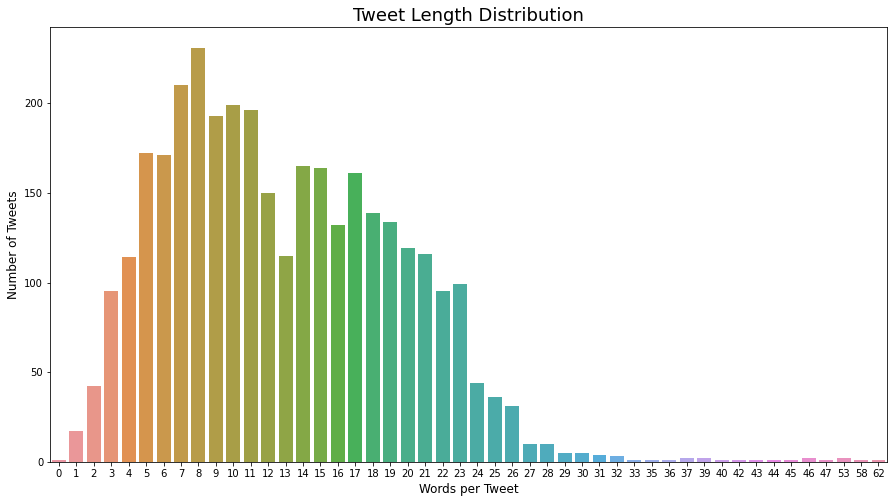

In [133]:
plt.figure(figsize = (15,8))
sns.countplot(tweet_lengths)
plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

In [134]:
all_words = [word for tokens in df2['text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df2['text']]
vocab = sorted(list(set(all_words)))


print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length in Top anomaly words is {}'.format(max(tweet_lengths)))
print('Min tweet length in Top anomaly words is {}'.format(min(tweet_lengths)))

58690 words total, with a vocabulary size of 14360
Max tweet length in Top anomaly words is 50
Min tweet length in Top anomaly words is 0


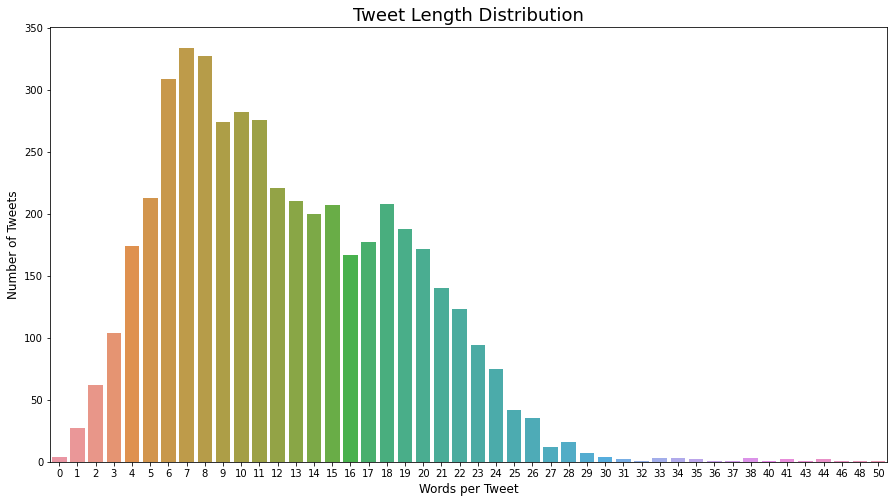

In [135]:
plt.figure(figsize = (15,8))
sns.countplot(tweet_lengths)
plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 12)
plt.ylabel('Number of Tweets', fontsize = 12)
plt.show()

#Bottom Quartiles

##WordCloud for Bottom Quartiles

In [136]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in df['text'] for item in sublist]

word_freq = FreqDist(flat_words)

word_freq.most_common(50)

[('time', 273),
 ('people', 254),
 ('live', 244),
 ('amp', 243),
 ('death', 157),
 ('know', 145),
 ('day', 142),
 ('year', 123),
 ('want', 114),
 ('trump', 112),
 ('end', 109),
 ('good', 109),
 ('life', 107),
 ('train', 106),
 ('right', 103),
 ('future', 103),
 ('park', 101),
 ('need', 99),
 ('damn', 98),
 ('think', 97),
 ('street', 94),
 ('place', 91),
 ('look', 90),
 ('coming', 88),
 ('love', 88),
 ('got', 88),
 ('find', 87),
 ('going', 85),
 ('come', 84),
 ('square', 83),
 ('said', 81),
 ('news', 80),
 ('coronavirus', 79),
 ('week', 76),
 ('case', 75),
 ('man', 74),
 ('found', 73),
 ('home', 72),
 ('police', 71),
 ('number', 69),
 ('shooting', 67),
 ('friend', 67),
 ('house', 66),
 ('manhattan', 65),
 ('great', 65),
 ('island', 65),
 ('way', 64),
 ('east', 64),
 ('border', 64),
 ('seen', 63)]

In [137]:
most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#create dictionary mapping of word count
top_30_dictionary = dict(zip(most_common_word, most_common_count))

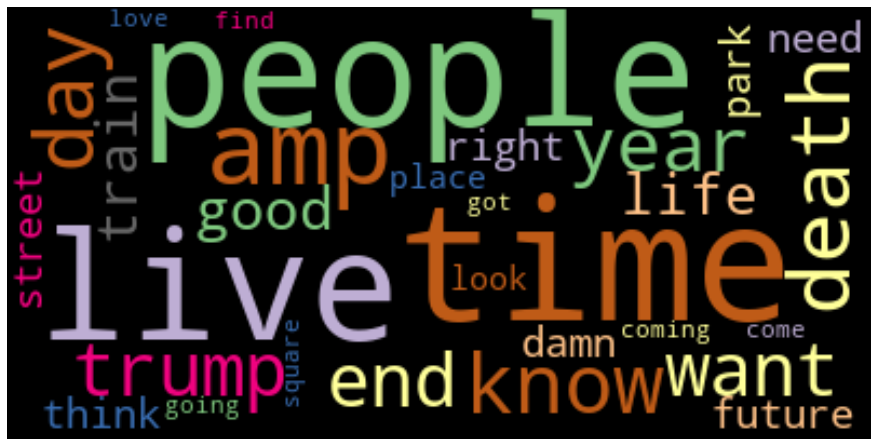

In [138]:
from wordcloud import WordCloud

#Create Word Cloud of top 30 words
wordcloud = WordCloud(colormap = 'Accent', background_color = 'black')\
.generate_from_frequencies(top_30_dictionary)

#plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('top_30_cloud.png')

plt.show()

##Bag of Words

In [139]:
from gensim.corpora import Dictionary

#create dictionary
text_dict = Dictionary(df.text)

#view integer mappings
text_dict.token2id

{'airport': 0,
 'guardia': 1,
 'la': 2,
 'live': 3,
 'talk': 4,
 'away': 5,
 'central': 6,
 'hello': 7,
 'i': 8,
 'issabove': 9,
 'mi': 10,
 'park': 11,
 'angeles': 12,
 'joshcometomexic': 13,
 'joshgroban': 14,
 'margaritha': 15,
 'myitalianangels': 16,
 'usa': 17,
 'cc': 18,
 'half': 19,
 'living': 20,
 'michaeljaco': 21,
 'poverty': 22,
 'as': 23,
 'big': 24,
 'canada': 25,
 'jazzybonesjones': 26,
 'lol': 27,
 'ny': 28,
 'train': 29,
 'yeah': 30,
 'bycherylcosta': 31,
 'circular': 32,
 'ethan': 33,
 'gray': 34,
 'motorist': 35,
 'report': 36,
 'ufo': 37,
 'watertown': 38,
 'amp': 39,
 'came': 40,
 'confirms': 41,
 'convenient': 42,
 'dead': 43,
 'fled': 44,
 'impd': 45,
 'man': 46,
 'pm': 47,
 'rural': 48,
 'shot': 49,
 'store': 50,
 'street': 51,
 'suspect': 52,
 'bc': 53,
 'christmas': 54,
 'fairytale': 55,
 'im': 56,
 'listening': 57,
 'mum': 58,
 'screaming': 59,
 'turn': 60,
 'apartment': 61,
 'manhattan': 62,
 'mark': 63,
 'price': 64,
 'time': 65,
 'airbnb': 66,
 'battery': 6

In [140]:
tweets_bow = [text_dict.doc2bow(tweet) for tweet in df['text']]

In [141]:
tweets_bow

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)],
 [(12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1)],
 [(3, 2),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1)],
 [(31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)],
 [(39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1)],
 [(53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1)],
 [(36, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(36, 1), (61, 1), (62, 1), (63, 1), (64, 1)],
 [(11, 1), (51, 1), (61, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1)],
 [(6, 1), (11, 1), (62, 1), (71, 1), (72, 1), (73, 1), (74, 1)],
 [(75, 1), (76, 1), (77, 1)],
 [(78, 1), (79, 1), (80, 1), (81, 1), (82, 1)],
 [(83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1)],
 [(89, 

## Topic Modeling for Bottom Quartiles

###LDA

In [142]:
from gensim.models.ldamodel import LdaModel

k = 5
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

tweets_lda.show_topics()

[(0,
  '0.005*"people" + 0.005*"country" + 0.004*"border" + 0.004*"love" + 0.004*"place" + 0.003*"time" + 0.003*"close" + 0.003*"live" + 0.003*"number" + 0.003*"going"'),
 (1,
  '0.006*"death" + 0.005*"day" + 0.004*"good" + 0.004*"live" + 0.004*"degree" + 0.004*"case" + 0.004*"news" + 0.004*"time" + 0.004*"central" + 0.003*"right"'),
 (2,
  '0.012*"time" + 0.009*"people" + 0.007*"death" + 0.007*"amp" + 0.005*"page" + 0.005*"square" + 0.005*"police" + 0.005*"end" + 0.004*"shooting" + 0.004*"loss"'),
 (3,
  '0.008*"train" + 0.007*"amp" + 0.005*"people" + 0.005*"trump" + 0.004*"dog" + 0.004*"lost" + 0.003*"derails" + 0.003*"want" + 0.003*"live" + 0.003*"east"'),
 (4,
  '0.009*"live" + 0.005*"amp" + 0.005*"year" + 0.004*"life" + 0.004*"time" + 0.004*"dead" + 0.004*"people" + 0.003*"think" + 0.003*"future" + 0.003*"know"')]

In [143]:
!pip install pyLDAvis

In [144]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)


In [145]:
pyLDAvis.save_html(vis, 'bottom_lda.html')

####Calculate LDA Coherence Score

In [146]:
from gensim.models import CoherenceModel
cm = CoherenceModel(model=tweets_lda, corpus=tweets_bow, texts=df['text'], coherence='c_v')
coherence_lda = cm.get_coherence() 
print(coherence_lda)

0.3553442971696395


###GSDMM Model

In [160]:
pip install git+https://github.com/rwalk/gsdmm.git

  Cloning https://github.com/rwalk/gsdmm.git to /tmp/pip-req-build-43qn4z80
  Running command git clone -q https://github.com/rwalk/gsdmm.git /tmp/pip-req-build-43qn4z80
  Created wheel for gsdmm: filename=gsdmm-0.1-py3-none-any.whl size=4602 sha256=cbea2f9d3349fc5a3d61ccc5ad0eac63d4606c7524555104a1c47d9cfee3e0b4
  Stored in directory: /tmp/pip-ephem-wheel-cache-wd9o975q/wheels/34/65/a6/7eef67b88abae954fecd22587bd755c27b58a9ffe488d6b0de
Successfully built gsdmm


In [163]:
import gensim
from gsdmm import MovieGroupProcess

# create variable containing length of dictionary/vocab
dict_length = len(text_dict)

# initialize GSDMM
gsdmm = MovieGroupProcess(K=12, alpha=0.1, beta=0.3, n_iters=12)

# fit GSDMM model
y = gsdmm.fit(df['text'], dict_length)

In stage 0: transferred 2706 clusters with 12 clusters populated
In stage 1: transferred 1540 clusters with 12 clusters populated
In stage 2: transferred 1261 clusters with 12 clusters populated
In stage 3: transferred 1021 clusters with 12 clusters populated
In stage 4: transferred 889 clusters with 12 clusters populated
In stage 5: transferred 737 clusters with 12 clusters populated
In stage 6: transferred 696 clusters with 12 clusters populated
In stage 7: transferred 620 clusters with 12 clusters populated
In stage 8: transferred 616 clusters with 12 clusters populated
In stage 9: transferred 567 clusters with 12 clusters populated
In stage 10: transferred 568 clusters with 12 clusters populated
In stage 11: transferred 561 clusters with 12 clusters populated


In [165]:
# the number of documents per topic
docs_count = np.array(gsdmm.cluster_doc_count)
print('Number of documents per topic :', docs_count)

# Topics sorted by the number of document they are allocated to
top_index = docs_count.argsort()[-15:][::-1]
print('Most important clusters (by number of docs inside):', top_index)

# A function to get top words per topic
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts = sorted(cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster, sort_dicts))

# top words in all topics
top_words(gsdmm.cluster_word_distribution, top_index, 20)

Number of documents per topic : [1437   42  103  259   55  305   73   64  120  127  701  111]
Most important clusters (by number of docs inside): [ 0 10  5  3  9  8 11  2  6  7  4  1]

Cluster 0 : [('live', 203), ('people', 109), ('know', 95), ('amp', 84), ('want', 83), ('day', 81), ('damn', 76), ('love', 73), ('think', 69), ('find', 67), ('year', 66), ('place', 65), ('life', 65), ('time', 62), ('got', 62), ('need', 61), ('going', 61), ('come', 59), ('right', 59), ('end', 57)]

Cluster 10 : [('death', 131), ('time', 109), ('amp', 81), ('people', 75), ('trump', 68), ('coronavirus', 63), ('case', 56), ('number', 48), ('page', 48), ('day', 39), ('know', 38), ('year', 37), ('realdonaldtrump', 37), ('name', 37), ('loss', 34), ('future', 33), ('incalculable', 31), ('list', 30), ('look', 30), ('said', 29)]

Cluster 5 : [('shooting', 60), ('people', 53), ('time', 45), ('square', 32), ('official', 32), ('dead', 30), ('police', 28), ('end', 27), ('killed', 25), ('brooklyn', 23), ('san', 23), ('d

In [166]:
def all_topics_lists(model, top_clusters, all_words):
    '''
    Gets lists of words in topics as a list of lists.
    
    model: gsdmm instance
    top_clusters:  numpy array containing indices of top_clusters
    all_words: top n number of words to include
    
    '''
    # create empty list to contain topics
    topics = []
    
    # iterate over top n clusters
    for cluster in top_clusters:
        #create sorted dictionary of word distributions
        sorted_dict = sorted(model.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:all_words]
         
        #create empty list to contain words
        topic = []
        
        #iterate over top n words in topic
        for k,v in sorted_dict:
            #append words to topic list
            topic.append(k)
            
        #append topics to topics list    
        topics.append(topic)
    
    return topics

# get topics to feed to coherence model
topics = all_topics_lists(gsdmm, top_index, 20)

###Coherence Score for GSDMM

In [168]:
cm_gsdmm = CoherenceModel(topics=topics, dictionary=text_dict, corpus=tweets_bow, texts=df['text'], coherence='c_v')
coherence_gsdmm = cm_gsdmm.get_coherence()  
print(coherence_gsdmm)

0.3912356062677638


In [199]:
cluster_word_distribution = gsdmm.cluster_word_distribution

# Select topic you want to output as dictionary (using topic_number)
topic_dict = sorted(cluster_word_distribution[1].items(), key=lambda k: k[1], reverse=True)[1]
# Generate a word cloud image
wordcloud = WordCloud(background_color='#fcf2ed', 
                            width=1800,
                            height=700,
                            # font_path=path_to_font,
                            colormap='flag').generate_from_frequencies(topic_dict)

# Print to screen
fig, ax = plt.subplots(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");


AttributeError: ignored

In [185]:
cluster_word_distribution[1].items()

dict_items([('central', 2), ('away', 3), ('usa', 3), ('amp', 2), ('trump', 6), ('hotel', 5), ('police', 5), ('interfaith', 2), ('group', 3), ('join', 2), ('muslim', 2), ('iftar', 2), ('tower', 3), ('solidarity', 2), ('grand', 4), ('station', 2), ('coming', 3), ('discus', 2), ('head', 3), ('shot', 4), ('big', 2), ('shooting', 2), ('lamborghinis', 2), ('parked', 2), ('major', 2), ('cryptocurrency', 2), ('conference', 2), ('el', 3), ('opened', 2), ('author', 3), ('jay', 4), ('baron', 2), ('nicorvo', 2), ('lit', 2), ('novel', 2), ('set', 6), ('catskill', 2), ('mountain', 2), ('genre', 2), ('amreading', 2), ('amwriting', 2), ('selfpublishing', 2), ('critically', 2), ('injured', 2), ('protester', 3), ('carried', 3), ('safety', 2), ('comrade', 2), ('protest', 3), ('arbolito', 3), ('quito', 3), ('larevolucióndeloszánganos', 3), ('sosecuador', 2), ('cidh', 3), ('bbcmundo', 2), ('cnnee', 3), ('actualidadrt', 3), ('djtunezblackout', 4), ('november', 5), ('los', 2), ('angeles', 3), ('december', 2)

In [198]:
sorted(cluster_word_distribution[1].items(), key=lambda k: k[1], reverse=True)[1][1]

6

#Top Quartiles

##WordCloud for Top Quartiles

In [147]:
all_words = [word for tokens in df2['text'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df2['text']]
vocab = sorted(list(set(all_words)))


print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length in Top anomaly words is {}'.format(max(tweet_lengths)))
print('Min tweet length in Top anomaly words is {}'.format(min(tweet_lengths)))

58690 words total, with a vocabulary size of 14360
Max tweet length in Top anomaly words is 50
Min tweet length in Top anomaly words is 0


In [148]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in df2['text'] for item in sublist]

word_freq = FreqDist(flat_words)

word_freq.most_common(50)

[('time', 319),
 ('live', 302),
 ('people', 292),
 ('amp', 280),
 ('mosque', 207),
 ('imam', 196),
 ('day', 176),
 ('future', 167),
 ('killed', 166),
 ('year', 162),
 ('find', 155),
 ('trump', 154),
 ('know', 153),
 ('coming', 145),
 ('man', 144),
 ('park', 143),
 ('brooklyn', 141),
 ('home', 133),
 ('going', 130),
 ('right', 129),
 ('shooting', 129),
 ('damn', 125),
 ('shot', 124),
 ('police', 124),
 ('assistant', 124),
 ('place', 123),
 ('death', 121),
 ('said', 120),
 ('come', 117),
 ('think', 116),
 ('end', 113),
 ('want', 112),
 ('street', 112),
 ('life', 109),
 ('found', 109),
 ('area', 106),
 ('center', 105),
 ('way', 102),
 ('good', 101),
 ('border', 99),
 ('island', 99),
 ('station', 97),
 ('news', 97),
 ('east', 96),
 ('family', 93),
 ('look', 93),
 ('house', 92),
 ('woman', 91),
 ('love', 89),
 ('lake', 89)]

In [149]:
most_common_count = [x[1] for x in word_freq.most_common(30)]
most_common_word = [x[0] for x in word_freq.most_common(30)]

#create dictionary mapping of word count
top_30_dictionary = dict(zip(most_common_word, most_common_count))

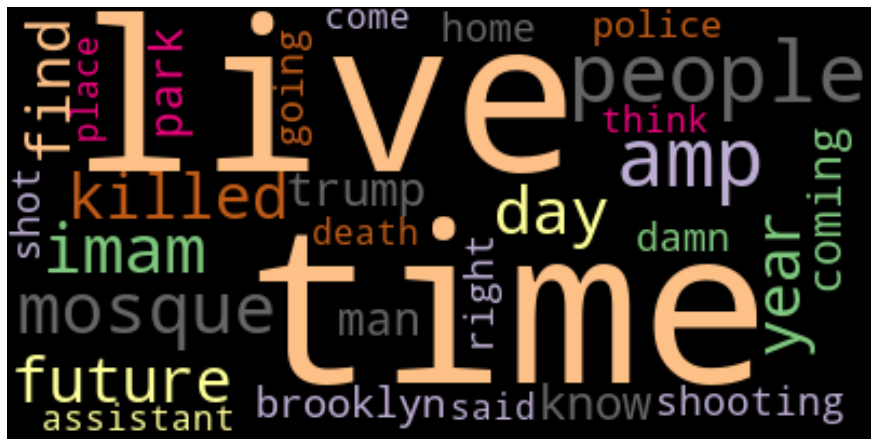

In [150]:
from wordcloud import WordCloud

#Create Word Cloud of top 30 words
wordcloud = WordCloud(colormap = 'Accent', background_color = 'black')\
.generate_from_frequencies(top_30_dictionary)

#plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('top_30_cloud.png')

plt.show()

##Bag of words

In [151]:
from gensim.corpora import Dictionary

#create dictionary
text_dict = Dictionary(df.text)

#view integer mappings
text_dict.token2id

{'airport': 0,
 'guardia': 1,
 'la': 2,
 'live': 3,
 'talk': 4,
 'away': 5,
 'central': 6,
 'hello': 7,
 'i': 8,
 'issabove': 9,
 'mi': 10,
 'park': 11,
 'angeles': 12,
 'joshcometomexic': 13,
 'joshgroban': 14,
 'margaritha': 15,
 'myitalianangels': 16,
 'usa': 17,
 'cc': 18,
 'half': 19,
 'living': 20,
 'michaeljaco': 21,
 'poverty': 22,
 'as': 23,
 'big': 24,
 'canada': 25,
 'jazzybonesjones': 26,
 'lol': 27,
 'ny': 28,
 'train': 29,
 'yeah': 30,
 'bycherylcosta': 31,
 'circular': 32,
 'ethan': 33,
 'gray': 34,
 'motorist': 35,
 'report': 36,
 'ufo': 37,
 'watertown': 38,
 'amp': 39,
 'came': 40,
 'confirms': 41,
 'convenient': 42,
 'dead': 43,
 'fled': 44,
 'impd': 45,
 'man': 46,
 'pm': 47,
 'rural': 48,
 'shot': 49,
 'store': 50,
 'street': 51,
 'suspect': 52,
 'bc': 53,
 'christmas': 54,
 'fairytale': 55,
 'im': 56,
 'listening': 57,
 'mum': 58,
 'screaming': 59,
 'turn': 60,
 'apartment': 61,
 'manhattan': 62,
 'mark': 63,
 'price': 64,
 'time': 65,
 'airbnb': 66,
 'battery': 6

In [152]:
tweets_bow = [text_dict.doc2bow(tweet) for tweet in df2['text']]
tweets_bow

[[(3, 1), (309, 1), (568, 1), (989, 1), (1073, 1), (7364, 1)],
 [(122, 1), (1351, 1), (2281, 1), (9988, 1), (10001, 1), (10890, 1)],
 [(199, 2),
  (1264, 1),
  (1294, 1),
  (2083, 1),
  (2111, 1),
  (3194, 1),
  (3894, 1),
  (9393, 1)],
 [(39, 1),
  (65, 2),
  (124, 1),
  (173, 1),
  (881, 1),
  (1136, 1),
  (1530, 1),
  (2878, 1),
  (4190, 1),
  (7198, 1)],
 [(401, 1), (438, 1), (551, 1), (1013, 1), (2291, 1)],
 [],
 [(65, 1),
  (334, 1),
  (649, 1),
  (918, 2),
  (943, 1),
  (1484, 1),
  (1495, 1),
  (2294, 1),
  (6872, 1)],
 [(200, 1), (326, 1), (714, 1), (918, 1), (3302, 1)],
 [(62, 1), (173, 1), (203, 1), (588, 1), (1753, 1), (4980, 1), (12153, 1)],
 [(780, 1), (2766, 1), (3010, 1), (5103, 1), (6356, 1), (6958, 1)],
 [(415, 2),
  (583, 1),
  (643, 1),
  (645, 1),
  (652, 1),
  (718, 1),
  (7406, 1),
  (7741, 1)],
 [(65, 1),
  (334, 1),
  (649, 1),
  (918, 2),
  (943, 1),
  (1484, 1),
  (1495, 1),
  (2294, 1),
  (6872, 1)],
 [(187, 1), (1532, 1), (1675, 1), (1707, 1)],
 [(326, 1), 

##Topic Modeling for Top Quartiles

###LDA

In [153]:
from gensim.models.ldamodel import LdaModel


k = 5
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

tweets_lda.show_topics()

[(0,
  '0.007*"year" + 0.006*"coming" + 0.006*"chicago" + 0.006*"going" + 0.006*"central" + 0.005*"area" + 0.005*"people" + 0.005*"live" + 0.005*"world" + 0.005*"place"'),
 (1,
  '0.007*"life" + 0.007*"station" + 0.006*"death" + 0.006*"service" + 0.005*"train" + 0.005*"amp" + 0.005*"time" + 0.005*"child" + 0.005*"penn" + 0.005*"trump"'),
 (2,
  '0.011*"police" + 0.010*"time" + 0.009*"park" + 0.008*"shot" + 0.008*"seen" + 0.007*"amp" + 0.007*"killed" + 0.007*"mosque" + 0.006*"street" + 0.006*"site"'),
 (3,
  '0.010*"brooklyn" + 0.008*"time" + 0.007*"man" + 0.006*"store" + 0.006*"ave" + 0.006*"killing" + 0.006*"heat" + 0.005*"shooting" + 0.005*"friday" + 0.005*"found"'),
 (4,
  '0.013*"live" + 0.012*"people" + 0.007*"future" + 0.006*"amp" + 0.006*"know" + 0.006*"damn" + 0.006*"state" + 0.005*"lot" + 0.005*"find" + 0.005*"day"')]

In [154]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim_models.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)

In [155]:
pyLDAvis.save_html(vis, 'top_lda.html')

####Calculate LDA Coherence Score

In [156]:
from gensim.models import CoherenceModel
cm = CoherenceModel(model=tweets_lda, corpus=tweets_bow, texts=df2['text'], coherence='c_v')
coherence_lda = cm.get_coherence() 
print(coherence_lda)

0.34364581747015915
